In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)#, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1500)#, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


653

## Perform API Calls

In [34]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key
api_key="e6488d4afd3881b596f321b719019bb2"
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key+"&q=" 
tempL=[]
humiL=[]
cloudL=[]
windL=[]
citiesL=[]
coordL=[]
problemdata=0
for x in cities:
    #cities list
    citiesL.append(x)
    #set the url with current city
    useurl=url+x
    #get the json data
    weather=requests.get(useurl).json()
    #get data and put it in the list
    try:
        coord=weather["coord"]["lat"]
        coordL.append(coord)
        temp=weather["main"]["temp"]
        tempL.append(temp)
        humidity=weather["main"]["humidity"]
        humiL.append(humidity)
        cloud=weather["clouds"]["all"]
        cloudL.append(cloud)
        wind=weather["wind"]["speed"]
        windL.append(wind)
    except KeyError:
        problemdata=problemdata+1

print(problemdata)        
#     coord=weather["coord"]["lat"]
#     coordL.append(coord)
#     temp=weather["main"]["temp"]
#     tempL.append(temp)
#     humidity=weather["main"]["humidity"]
#     humiL.append(humidity)
#     cloud=weather["clouds"]["all"]
#     cloudL.append(cloud)
#     wind=weather["wind"]["speed"]
#     windL.append(wind)
# print(coordL)
# print(tempL)
# print(humiL)
# print(cloudL)
# print(windL)

66


Text(0,0.5,'tempurature(F)')

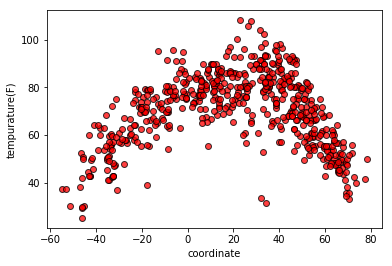

In [39]:
plt.scatter(coordL, tempL, marker="o", facecolors="red", 
            edgecolors="black", alpha=0.75)
plt.xlabel("coordinate")
plt.ylabel("tempurature(F)")

Text(0,0.5,'humidity(%)')

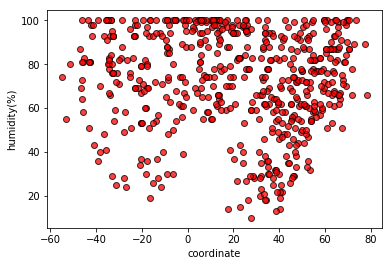

In [40]:
plt.scatter(coordL, humiL, marker="o", facecolors="red", 
            edgecolors="black", alpha=0.75)
plt.xlabel("coordinate")
plt.ylabel("humidity(%)")

Text(0,0.5,'cloudiness(%)')

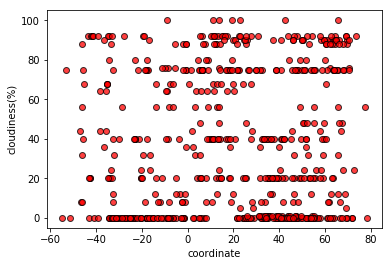

In [41]:
plt.scatter(coordL, cloudL, marker="o", facecolors="red", 
            edgecolors="black", alpha=0.75)
plt.xlabel("coordinate")
plt.ylabel("cloudiness(%)")

Text(0,0.5,'wind speed(MPH)')

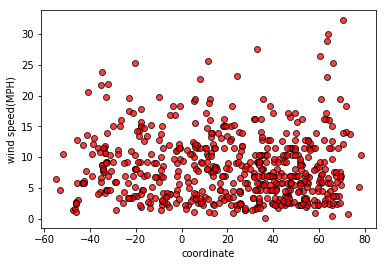

In [38]:
plt.scatter(coordL, windL, marker="o", facecolors="red", 
            edgecolors="black", alpha=0.75)
plt.xlabel("coordinate")
plt.ylabel("wind speed(MPH)")

In [67]:
#time.sleep() 

[2, 1]